In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [79]:
X = np.arange(10)
Y = (X-5)**2
plt.style.use("seaborn")
plt.plot(X,Y)
plt.ylabel("y = f(X)")
plt.xlabel("X")
plt.title("Convex function y=(x-5)2") # assume ground truth value is 5
plt.show()

In [80]:
x = 0
y = (x-5)**2
plt.scatter(x, y, s=100)
plt.plot(X,Y)

<IPython.core.display.Javascript object>


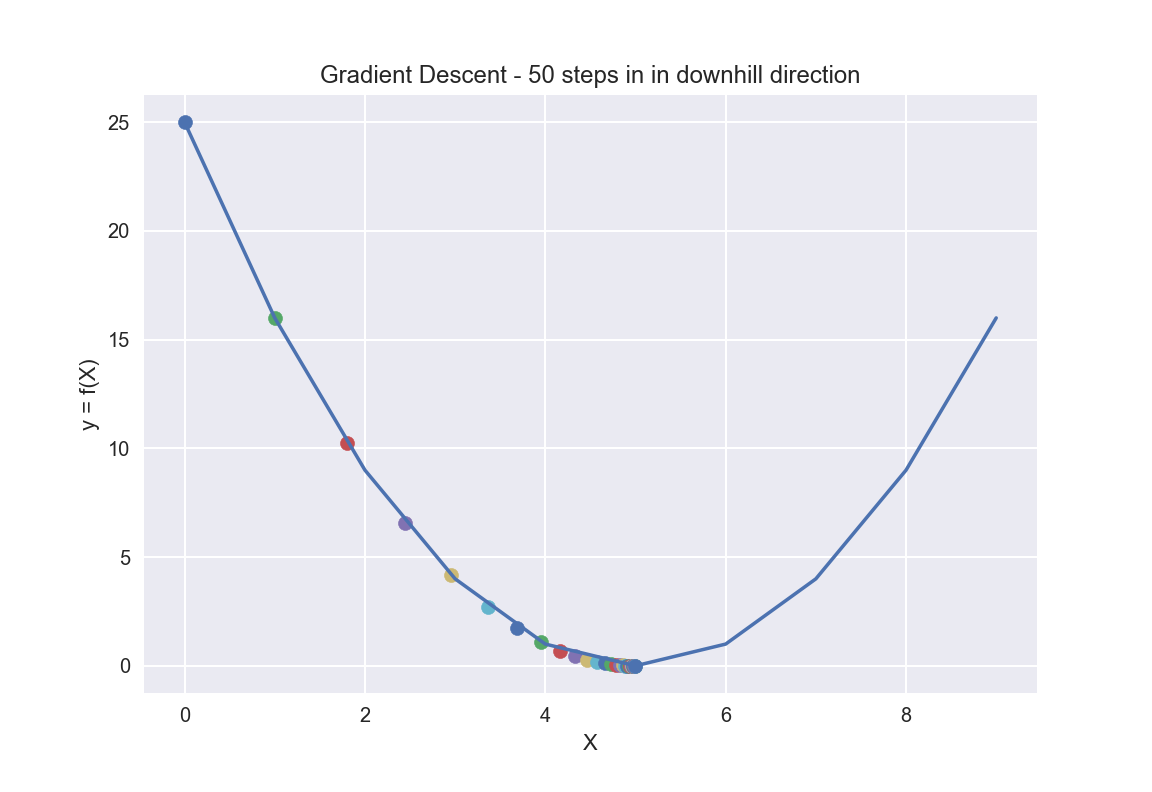

In [81]:
import time
%matplotlib notebook 

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion() 

x = 0 # random initialization
y = (x-5)**2 # calculting the loss
plt.plot(X,Y)
plt.scatter(x,y)
plt.ylabel("y = f(X)")
plt.xlabel("X")
plt.title("Gradient Descent - 50 steps in in downhill direction") 
lr = 0.1

errors = []

max_itr = 30
#10 steps in the downhill direction
for i in range(max_itr):
    grad = 2*(x-5) # calculating gradient
    x = x - lr*grad # update equation
    y = (x-5)**2 # current error
    error = y - 0
    errors.append(error)
    plt.scatter(x,y)
    fig.canvas.draw()
    time.sleep(0.5)
plt.show()

<IPython.core.display.Javascript object>


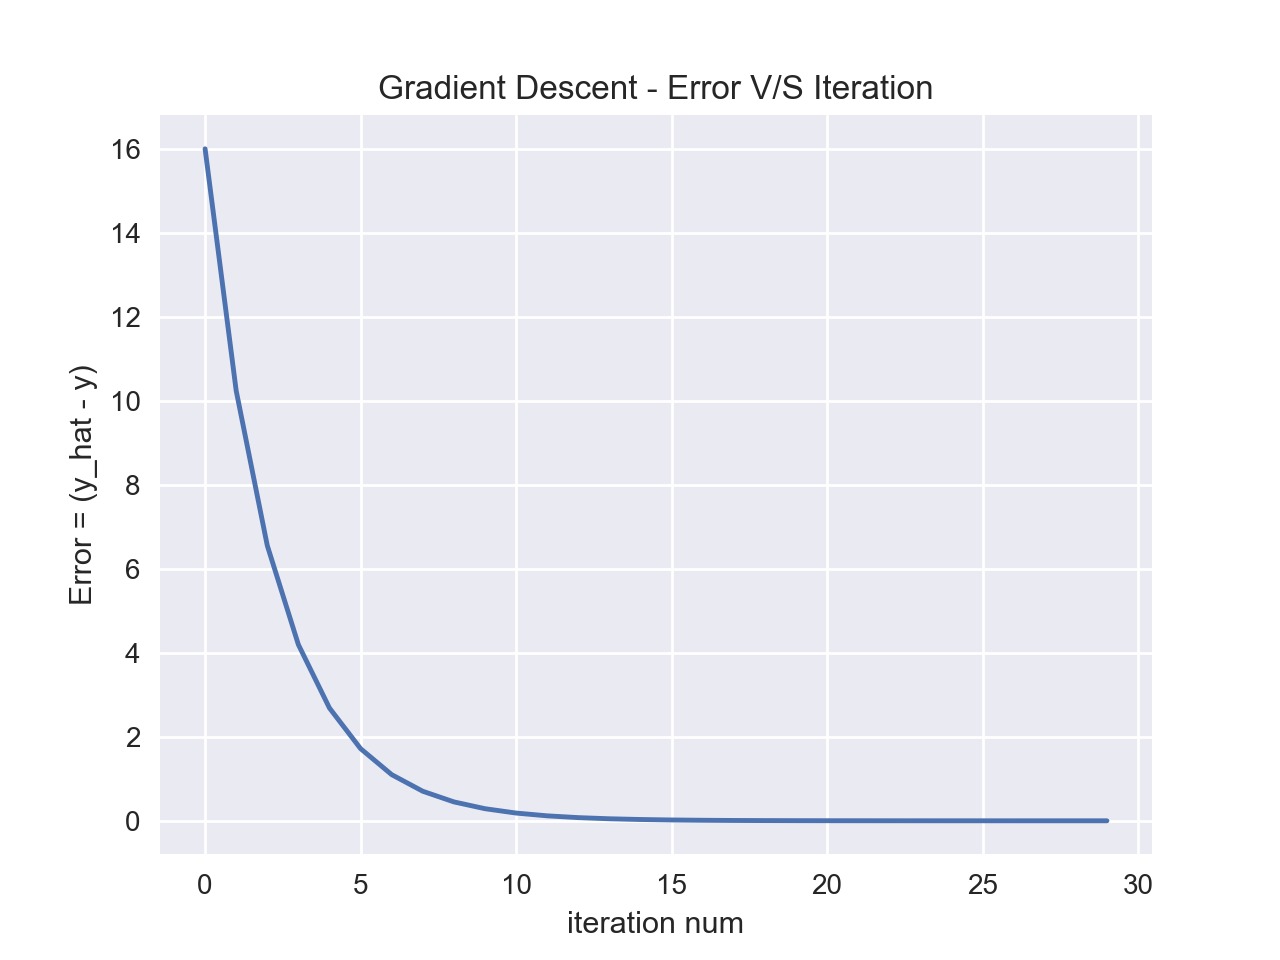

In [15]:
plt.plot(errors)
plt.xlabel("iteration num")
plt.ylabel("Error = (y_hat - y)")
plt.title("Gradient Descent - Error V/S Iteration")
plt.show()

# Simple Linear Regression

In [29]:
df = pd.read_csv('cars24-car-price.csv')

In [30]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [36]:
X = df['max_power'].values
Y = df['selling_price'].values

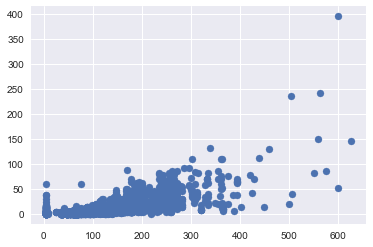

In [37]:
%matplotlib inline
plt.scatter(X, Y)
plt.show()

# Data Preprocessing

In [41]:
### Standardisation
mu = X.mean()
print(mu)

sig = X.std()
print(sig)

97.85444319319319
45.07954163959481


In [42]:
X_new = (X - mu )/sig

In [60]:
X_new[:5]

array([-1.14363282, -0.3516993 , -0.39606532, -0.68222617,  0.01631687])

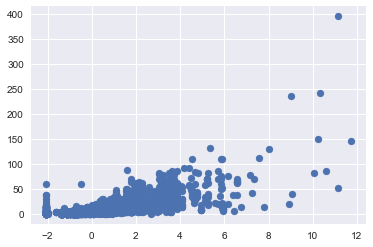

In [61]:
plt.scatter(X_new, Y)
plt.show()

# Scratch Implementation

In [19]:
def hypothesis(x, theta):
    '''
    theta : np.array() - [theta_0, theta_1]
    '''
    
    y_hat = theta[0] + theta[1]*x 
    return y_hat

In [22]:
def error(X, Y, theta):
    '''
    X : input column  - max_power
    Y : output column - selling price
    
    return : scalar : badness
    '''
    
    m = X.shape[0]
    total_err = 0.0
    
    for i in range(m):
        y_hat_i = hypothesis(X[i], theta)
        total_err += (Y[i] - y_hat_i)**2
    
    return total_err/(2*m)

In [26]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        y_hat_i = hypothesis(X[i], theta)
        grad[0] += (y_hat_i - Y[i])
        grad[1] += (y_hat_i - Y[i])*X[i]
        
    return grad/m

In [50]:
def gradient_descent(X, Y, max_itr= 50, learning_rate = 0.1):
    
    # step 1: randomly init thetas
    
    theta = np.zeros((2,))
    
    error_list = []
    
    for i in range(max_itr):
        grad = gradient(X, Y, theta)

        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        #theta = theta - learning_rate*grad
        
        e = error(X,Y, theta)
        error_list.append(e)
        
        
    return theta, error_list

In [71]:
opt_theta, error_list = gradient_descent(X_new, Y, max_itr=100)

In [72]:
opt_theta

array([7.39186968, 6.67463389])

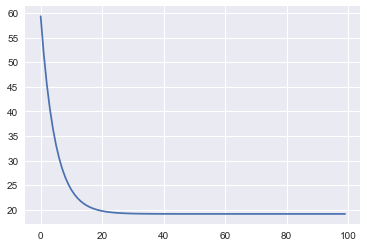

In [73]:
plt.plot(error_list)

## Prediction

In [74]:
hypothesis(10, opt_theta)

74.1382085496498

In [75]:
y_hat = hypothesis(X_new, opt_theta)
print(y_hat.shape)

(19980,)


In [76]:
print(y_hat)

[-0.24146068  5.04440562  4.74827866 ...  8.23073175 13.63208756
 10.31546557]


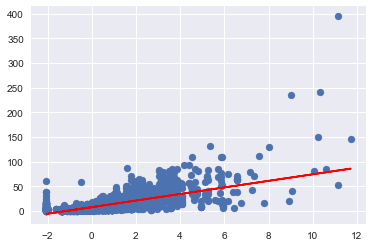

In [77]:
plt.plot(X_new, y_hat, color='red')
plt.scatter(X_new, Y)
plt.show()